<a href="https://colab.research.google.com/github/VaishnaviBairagoni/NLP-LAB/blob/main/(NLP-M-25-8-2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load dataset
df = pd.read_csv('/annual-enterprise-survey-2024-financial-year-provisional.csv')  # replace with your file name

# Q1: Document counts per type
doc_counts = df['Variable_name'].value_counts()
print("Document counts per type:\n", doc_counts)

Document counts per type:
 Variable_name
Total income                                             1668
Interest, dividends and donations                        1668
Non-operating income                                     1668
Total expenditure                                        1668
Interest and donations                                   1668
Depreciation                                             1668
Indirect taxes                                           1668
Salaries and wages paid                                  1668
Redundancy and severance                                 1668
Return on total assets                                   1668
Non-operating expenses                                   1668
Closing stocks                                           1668
Opening stocks                                           1668
Surplus before income tax                                1668
Total assets                                             1668
Shareholders funds or owners 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # NEW requirement for NLTK >= 3.8
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Custom legal stopwords list
legal_stopwords = set([
    'herein', 'thereof', 'hereto', 'whereas', 'therein', 'wherein',
    'hereby', 'hereafter', 'thereafter', 'thereupon'
])
stop_words = set(stopwords.words('english')).union(legal_stopwords)

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation/numbers
    tokens = word_tokenize(text.lower())     # Lowercase + tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df['clean_text'] = df['Variable_name'].apply(clean_text)
print(df[['Variable_name', 'clean_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                     Variable_name  \
0                                     Total income   
1  Sales, government funding, grants and subsidies   
2                Interest, dividends and donations   
3                             Non-operating income   
4                                Total expenditure   

                              clean_text  
0                           total income  
1  sale government funding grant subsidy  
2             interest dividend donation  
3                    nonoperating income  
4                      total expenditure  


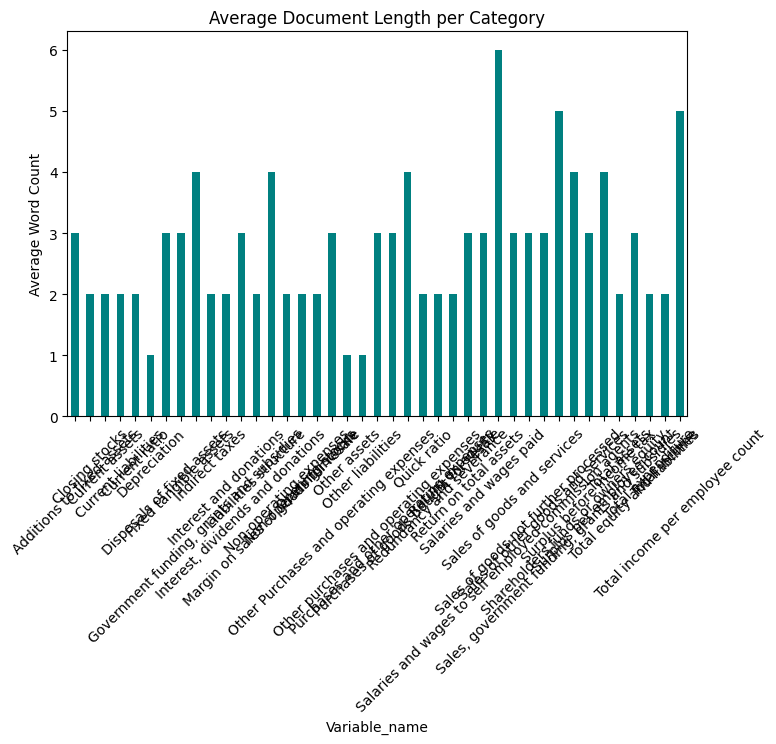

In [11]:
# Calculate average length
df['doc_length'] = df['clean_text'].apply(lambda x: len(x.split()))
avg_length = df.groupby('Variable_name')['doc_length'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_length.plot(kind='bar', color='teal')
plt.title('Average Document Length per Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.show()


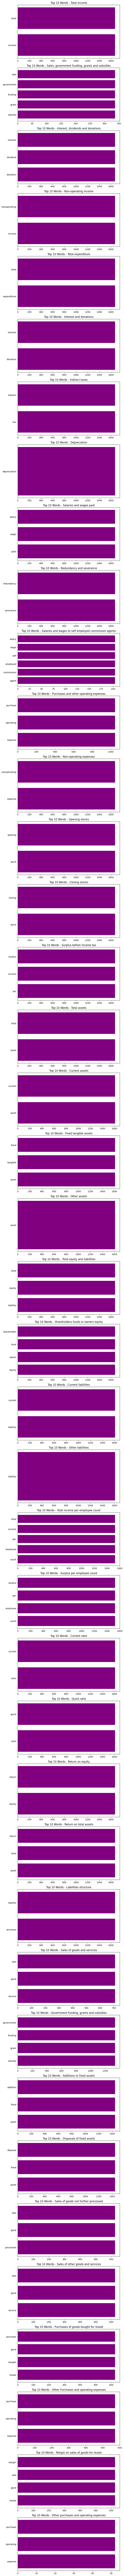

In [12]:
# Get top 10 words per doc type
top_words_per_type = {}

for doc_type in df['Variable_name'].unique():
    all_words = ' '.join(df[df['Variable_name'] == doc_type]['clean_text']).split()
    most_common = Counter(all_words).most_common(10)
    top_words_per_type[doc_type] = most_common

# Plot with subplots
fig, axes = plt.subplots(len(top_words_per_type), 1, figsize=(8, len(top_words_per_type)*4))

for i, (doc_type, words) in enumerate(top_words_per_type.items()):
    words, counts = zip(*words)
    axes[i].barh(words, counts, color='purple')
    axes[i].set_title(f'Top 10 Words - {doc_type}')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()


In [13]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['clean_text'])


In [14]:
# Vocabulary size
vocab_size = len(vectorizer.vocabulary_)
print("Vocabulary size:", vocab_size)

# Most common bigrams
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Filter bigrams only
bigrams = [w for w in words_freq if len(w[0].split()) == 2][:10]

print("Most common bigrams:")
for bigram, freq in bigrams:
    print(f"{bigram}: {freq}")


Vocabulary size: 110
Most common bigrams:
total asset: 3336
total income: 3192
per employee: 3048
employee count: 3048
fixed asset: 2880
sale good: 2580
salary wage: 1872
government funding: 1668
funding grant: 1668
grant subsidy: 1668
